In [2]:
import pandas as pd
import numpy as np

In [3]:
df_articles = pd.read_csv('shared_articles.csv')
df_users = pd.read_csv('users_interactions.csv')

In [4]:
df_articles.head(5)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [5]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [6]:
df_articles.shape

(3122, 13)

In [7]:
df_articles.columns

Index(['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url', 'title', 'text', 'lang'],
      dtype='object')

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    72312 non-null  int64 
 1   eventType    72312 non-null  object
 2   contentId    72312 non-null  int64 
 3   personId     72312 non-null  int64 
 4   sessionId    72312 non-null  int64 
 5   userAgent    56918 non-null  object
 6   userRegion   56907 non-null  object
 7   userCountry  56918 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [9]:
df_users.shape

(72312, 8)

In [10]:
df_users.head(5)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [12]:
df = df_users

In [13]:
df['COUNTER'] =1       #initially, set that counter to 1.
group_data = df.groupby(['contentId','eventType'])['COUNTER'].sum().reset_index() #sum function
print(group_data)

                contentId        eventType  COUNTER
0    -9222795471790223670         BOOKMARK        1
1    -9222795471790223670  COMMENT CREATED        2
2    -9222795471790223670           FOLLOW        3
3    -9222795471790223670             LIKE        4
4    -9222795471790223670             VIEW       16
...                   ...              ...      ...
7335  9217155070834564627  COMMENT CREATED        2
7336  9217155070834564627             VIEW       14
7337  9220445660318725468             LIKE        2
7338  9220445660318725468             VIEW       50
7339  9222265156747237864             VIEW        5

[7340 rows x 3 columns]


In [14]:
events_df = group_data.pivot_table('COUNTER', ['contentId'], 'eventType')

In [15]:
events_df = events_df.fillna(0)


In [16]:
def label(row):
   return (1* row['VIEW']) + (4*row['LIKE']) + (10*row['COMMENT CREATED']) +( 25*row['FOLLOW'] )+ (100*row['BOOKMARK'])

events_df['label'] = events_df.apply (lambda row: label(row), axis=1)

In [17]:
events_df

eventType,BOOKMARK,COMMENT CREATED,FOLLOW,LIKE,VIEW,label
contentId,,,,,,
-9222795471790223670,1.0,2.0,3.0,4.0,16.0,227.0
-9216926795620865886,1.0,1.0,1.0,3.0,15.0,162.0
-9194572880052200111,2.0,1.0,1.0,4.0,21.0,272.0
-9192549002213406534,0.0,1.0,0.0,5.0,50.0,80.0
-9190737901804729417,0.0,0.0,0.0,1.0,8.0,12.0
...,...,...,...,...,...,...
9213260650272029784,0.0,0.0,0.0,0.0,11.0,11.0
9215261273565326920,3.0,0.0,0.0,3.0,24.0,336.0
9217155070834564627,0.0,2.0,0.0,0.0,14.0,34.0


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(events_df, test_size=0.2)


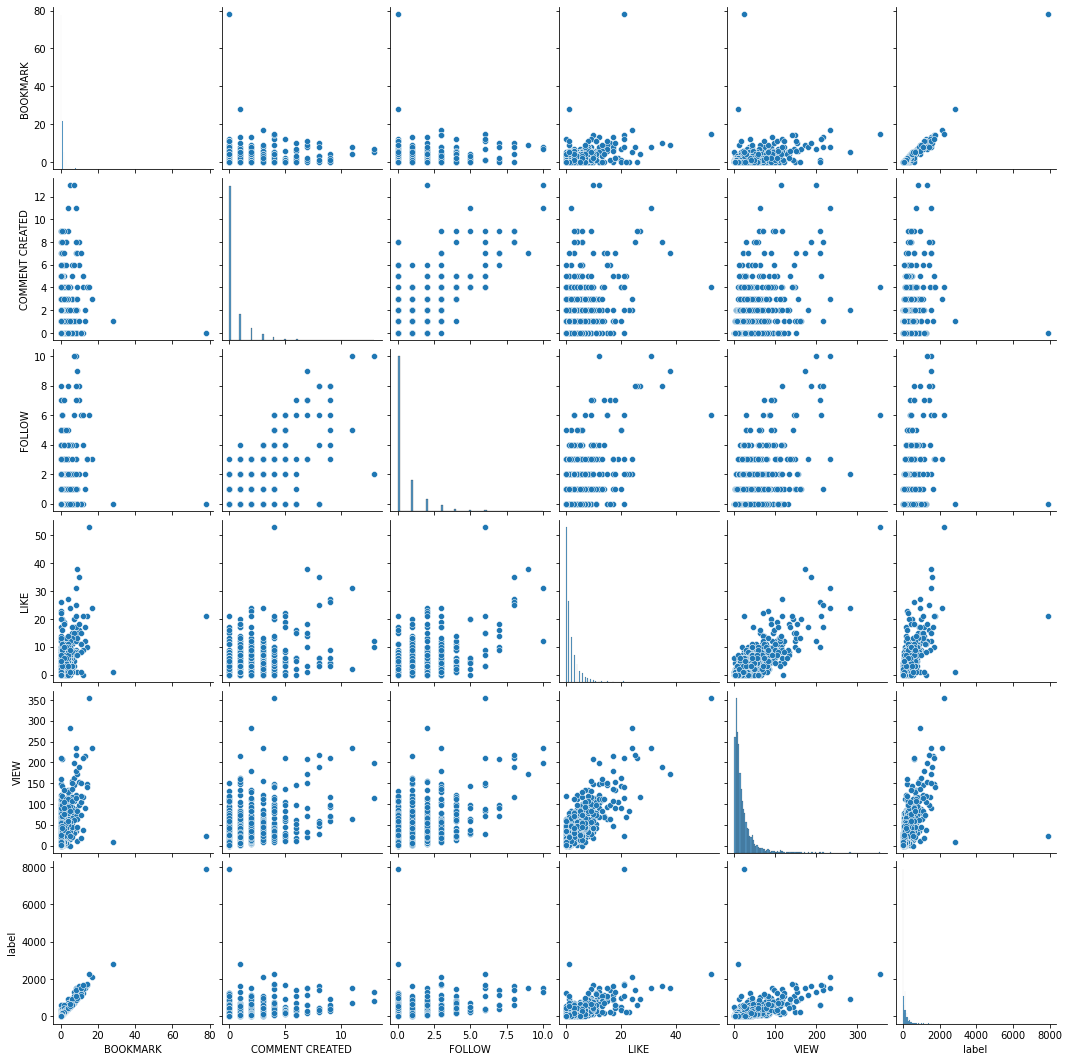

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.pairplot(train)


<AxesSubplot:xlabel='eventType', ylabel='eventType'>

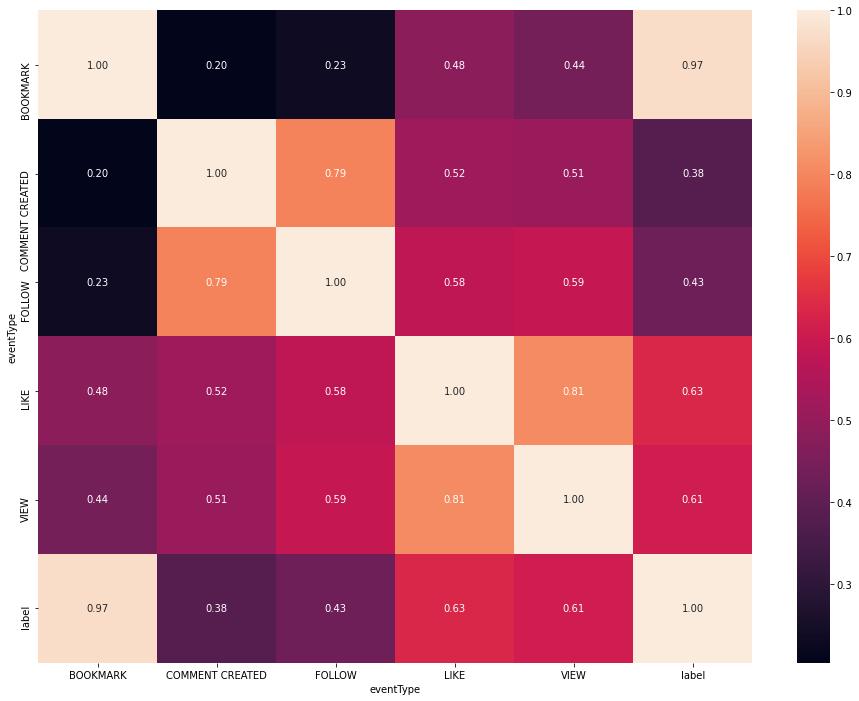

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(),annot=True,fmt=".2f")


In [21]:

train_X, train_Y = train.drop('label',axis = 1), train['label']
test_X, test_Y = test.drop('label',axis = 1), test['label']

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


lr = LinearRegression()
lr.fit(train_X,train_Y)
lr.score(train_X,train_Y)
predict_test = lr.predict(test_X)


res = dict()
metrics = dict()

res['lr'] = lr.coef_
metrics['lr'] = r2_score(test_Y, predict_test),explained_variance_score(test_Y,predict_test)


In [24]:
new_post = [2,3,78,4,23]

new_post_f = np.array(new_post).reshape(1,-1)

predict_new_post = lr.predict(new_post_f)
print(predict_new_post)

[2219.]


In [ ]:
# df = pd.merge(df_articles, df_users, on='contentId')

In [ ]:
# df.tail()

In [ ]:
#(3122, 13)
#(72312, 8)


In [ ]:
# df.shape

In [ ]:
# df.tail()

In [ ]:
# df[df["contentId"] == 4109618890343020064]